In [27]:
from __future__ import (absolute_import, division, print_function)
from six.moves import (filter, input, map, range, zip)  # noqa
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import iris.analysis.cartography
import iris.coord_categorisation as icc
import numpy as np

In [60]:
slope_path = '/home/bschmidt/data/test_tas_slope.nc4'
intercept_path = '/home/bschmidt/data/test_tas_intercept.nc4'
gmt_path = '/home/bschmidt/data/test_gmt.nc4'
data_path = '/home/bschmidt/data/test_data_tas.nc4'

slope = iris.load_cube(slope_path)
slope.rename('slope')
slope.coord('dim0').rename('day_of_year')
intercept = iris.load_cube(intercept_path)
intercept.rename('intercept')
intecept.coord('dim0').rename('day_of_year')
gmt = iris.load_cube(gmt_path)
data = iris.load_cube(data_path)

icc.add_day_of_year(data, 'time')

#data.coord('latitude').guess_bounds()
#data.coord('longitude').guess_bounds()

#grid_areas = iris.analysis.cartography.area_weights(data)
#data_collapsed = data.collapsed(['longitude', 'latitude'], 
#                                iris.analysis.MEAN, 
#                                weights=grid_areas)
#print(data_collapsed)
gmt = gmt.extract(iris.Constraint(day_of_year=1))
print(gmt)
#fit = intercept.data[1, 0, 0] + (slope.data[1, 0, 0] * gmt)
#print(fit)

tas / (1)                           (time: 110)
     Dimension coordinates:
          time                           x
     Auxiliary coordinates:
          day_of_year                    x
     Attributes:
          Conventions: CF-1.5
     Cell methods:
          mean: longitude, latitude


In [109]:
slope.coord('dim0').rename('day_of_year')

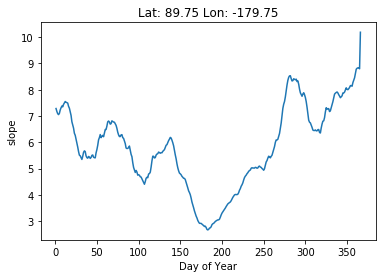

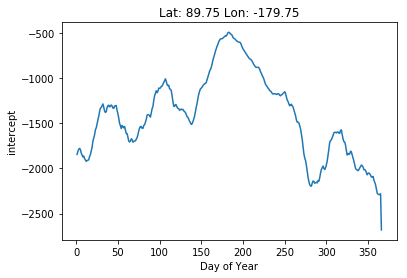

In [110]:
def plot_1d_doy(data, lat_ind, lon_ind):
    # Take a 1d slice with doy on x axis
    lat = data.coord('latitude').points[lat_ind]
    lon = data.coord('longitude').points[lon_ind]
    data_1d = data[:, lat_ind, lon_ind]
    fig = iplt.plot(data_1d)
    plt.title('Lat: ' + str(lat) + ' Lon: ' + str(lon))
    plt.xlabel('Day of Year')
    plt.ylabel(data.name())
    plt.show()

plot_1d_doy(slope, 0, 0)
plot_1d_doy(intercept, 0, 0)
#print(slope)


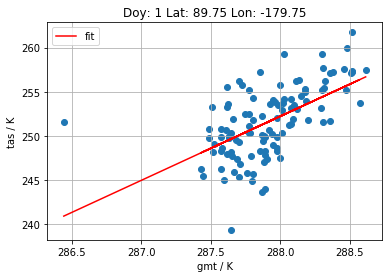

In [126]:
def regr_fit(slope, intercept, data, gmt, indices=(0, 0, 0)):
    
    doy = slope.coord('day_of_year').points[indices[0]]
    lat = slope.coord('latitude').points[indices[1]]
    lon = slope.coord('longitude').points[indices[2]]
    
    slope = slope[indices]
    intercept = intercept[indices]
    plot_data = data.extract(iris.Constraint(day_of_year=indices[0]+1))
    plot_data = plot_data[:, indices[1], indices[2]]
    
    fit = intercept.data + (slope.data * gmt.data)
    #print(fit)
    # Plot the data of one point and fit the regression.
    plt.scatter(gmt.data, plot_data.data)
    plt.plot(gmt.data, fit, 'r', label='fit')
    plt.title('Doy: ' + str(doy) + ' Lat: ' + str(lat) + ' Lon: ' + str(lon))
    plt.xlabel('gmt / K')
    plt.ylabel(data.name() + ' / K')
    plt.legend(ncol=2)
    plt.grid(True)
    plt.axis('tight')
    iplt.show()


regr_fit(slope, intercept, data, gmt)

In [124]:
gmt.name()

'tas'

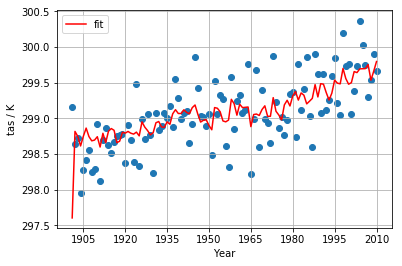

In [101]:
def regr_fit(slope, intercept, data, gmt):
    slope = slope[1, 6, 12]
    intercept = intercept[1, 6, 12]
    plot_data = data.extract(iris.Constraint(day_of_year=1))
    plot_data = plot_data[:, 6, 12]
    
    fit = intercept.data + (slope.data * gmt.data)
    time_values = np.round(gmt.coord('time').points/365 + 1901)
    #print(fit)
    # Plot the data of one point and fit the regression.
    fig, ax = plt.subplots()
    ax.scatter(time_values, plot_data.data)
    ax.plot(time_values, fit, 'r', label='fit')
    plt.xlabel('Year')
    plt.ylabel('tas / K')
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.legend(ncol=2)
    plt.grid(True)
    plt.axis('tight')
    iplt.show()


regr_fit(slope, intercept, data, gmt)

In [97]:
np.round(gmt.coord('time').points/365 + 1901)

array([1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908., 1909.,
       1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917., 1918.,
       1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926., 1927.,
       1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935., 1936.,
       1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944., 1945.,
       1946., 1947., 1948., 1949., 1950., 1951., 1952., 1953., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010.])

In [74]:
def ts_plot(slope, intercept, data, gmt, constraints=(1, 0, 0)):
    slope = slope[constraints]
    intercept = intercept[constraints]
    fit = intercept.data + (slope.data * gmt.data)
    iplt.plot(fit[1:])
    plt.legend(ncol=2)
    plt.grid(True)
    plt.axis('tight')
    iplt.show()


ts_plot(slope, intercept, data, gmt)

TypeError: Plot arguments must be cubes or coordinates.

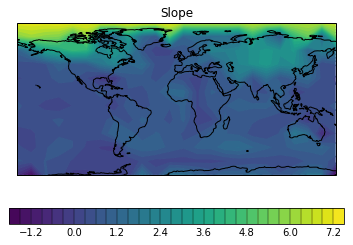

In [67]:

# Take a 2d slice of slope for one doy and plot as filled contour
slope_2d = slope[1, :, :]
contour = qplt.contourf(slope_2d, 30)
plt.gca().coastlines()
#plt.clabel(contour, inline=False)
plt.show()

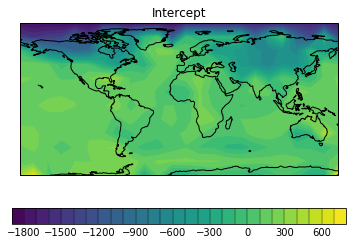

In [66]:
# Take a 2d slice of intercept for one doy and plot as filled contour
intercept_2d = intercept[1, :, :]
contour = qplt.contourf(intercept_2d, 30)
plt.gca().coastlines()
#plt.clabel(contour, inline=False)
plt.show()